<a href="https://colab.research.google.com/github/Ashwani8525/Telecom-churn--data-analysis/blob/main/Capstone_project_telecom_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.
Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

In [3]:
#import the drive from google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#importing the required packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#insert the data file
telecom_df = pd.read_csv('/content/drive/MyDrive/Telecom Churn.csv')

In [ ]:
#Getting the shape of data frame
telecom_df.shape

(3333, 20)

In [ ]:
#view the data of top five rows
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#Number of state in dataframe
len(telecom_df.State.unique())

51

In [ ]:
#Getting the datatype of dataframe
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
#Name of the columns in Dataframe
telecom_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
#describtion of dataframe
telecom_df.describe(include = 'all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [ ]:
#unique value of each column of data frame
telecom_df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

# Checking the null and duplicate ***value***

In [ ]:
#checking null value
telecom_df.isna().sum()
telecom_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
#checking duplicate value
len(telecom_df[telecom_df.duplicated()])

0

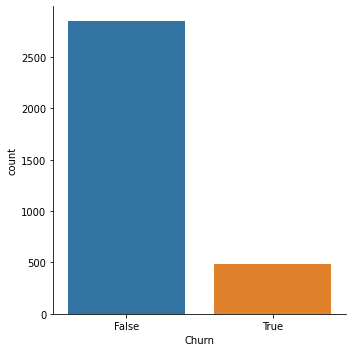

In [9]:
# Comparing the Churn value in catplot
sns.catplot(x= 'Churn', kind = 'count', data =telecom_df, order = telecom_df.Churn.value_counts().index)

In [14]:
print(telecom_df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


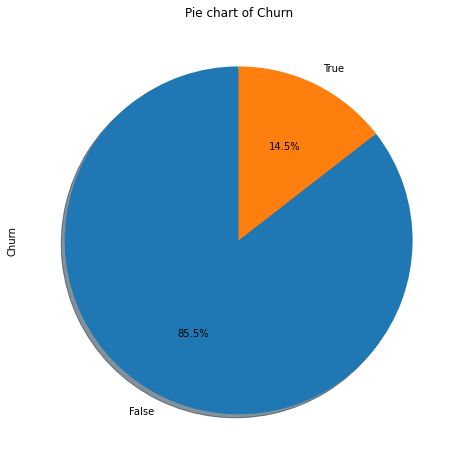

In [52]:
from matplotlib.patches import Shadow
#To get pie chart to anylise churn
telecom_df.Churn.value_counts().plot.pie(autopct ='%1.1f%%', startangle= 90,shadow = True, figsize= (8,8))
plt.title('Pie chart of Churn')
plt.show()

*After analyzing the churn column, we had little to say like almost 15% of customers have churned.*

***Analysing State Column***

In [33]:
# printing unique value of state
telecom_df.State.nunique()

51

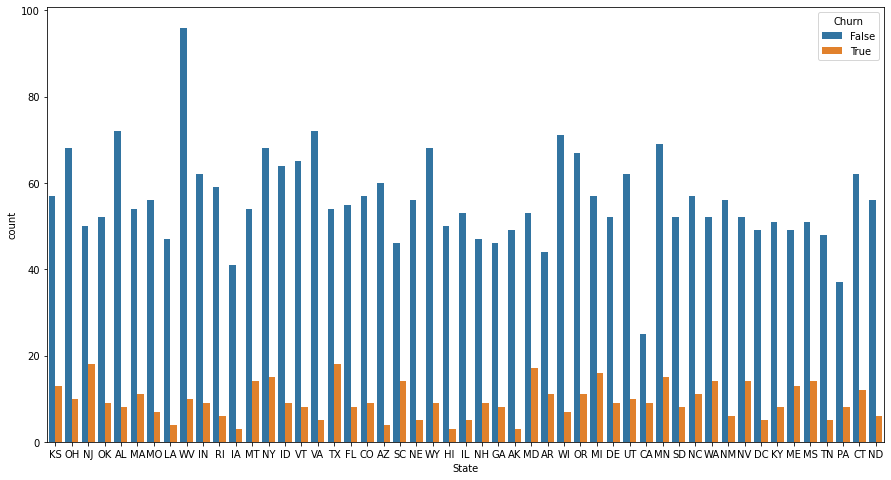

In [38]:
#Comparing churn with State by using count plot

plt.rcParams['figure.figsize'] = (15,8)
sns.countplot(x= 'State',hue ='Churn' , data = telecom_df)
plt.show()

**Analysing Total Minutes of Call**

In [15]:
# Finding the total minutes of telecom_df
telecom_df['total_minutes'] =telecom_df['Total day minutes'] + telecom_df['Total eve minutes'] + telecom_df['Total night minutes'] + telecom_df['Total intl minutes']

In [18]:
#grouping state by total minutes
telecom_df.groupby('State')['total_minutes'].sum()


State
AK    29380.7
AL    46324.0
AR    32614.5
AZ    36095.3
CA    20091.0
CO    38634.2
CT    44031.2
DC    31568.7
DE    36418.0
FL    37548.3
GA    32032.2
HI    30797.0
IA    25747.8
ID    42801.9
IL    33543.1
IN    43972.0
KS    42621.9
KY    34161.5
LA    29933.1
MA    39561.9
MD    42196.4
ME    36865.5
MI    43216.4
MN    50636.6
MO    37164.0
MS    38325.3
MT    39668.4
NC    40445.4
ND    37483.2
NE    36444.7
NH    33276.5
NJ    41596.1
NM    36837.8
NV    39469.6
NY    48585.1
OH    47151.3
OK    35401.1
OR    45862.2
PA    26387.3
RI    38510.3
SC    34736.9
SD    36227.2
TN    32170.7
TX    42274.9
UT    41735.8
VA    46587.4
VT    44131.5
WA    39097.6
WI    45674.0
WV    60789.7
WY    45858.1
Name: total_minutes, dtype: float64

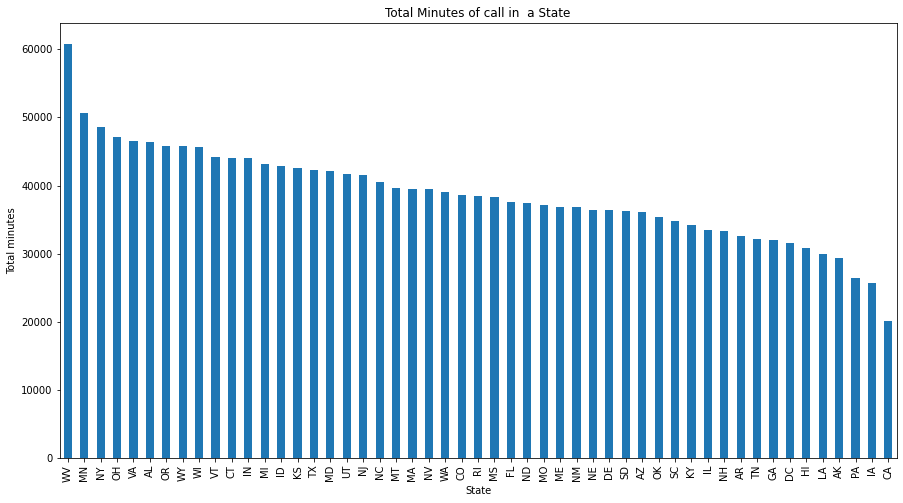

In [31]:
# plotting state and total minutes
plt.rcParams['figure.figsize'] = (15,8)
telecom_df.groupby('State')['total_minutes'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Total Minutes of call in  a State')
plt.ylabel('Total minutes')
plt.xlabel('State')
plt.show()

In [29]:
#maximum total minutes in state
print(telecom_df.groupby('State')['total_minutes'].sum().idxmax()) 
print(telecom_df.groupby('State')['total_minutes'].sum().max())

WV
60789.7


In [30]:
#minimum total minutes in state
print(telecom_df.groupby('State')['total_minutes'].sum().idxmin())
print(telecom_df.groupby('State')['total_minutes'].sum().min())

CA
20091.0
